## Overview
* This Notebook is to provide high-level analysis of labelled results. It is recommended to perform further analysis prior to using labelled data in training of machine learning models. 

### Initial Statistics

In [1]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Labelled Data to be Analyzed  
file_path = 'combined_observer_results.csv'
data = pd.read_csv(file_path)

# Initial Formatting of Data 
film_type_mapping = {'White': 1, 'Gray': 2, 'Dark Gray': 3}
data['film_type_numeric'] = data['film_type'].map(film_type_mapping)

# Exploration of Data
print("Data Preview:\n", data.head(2))

# Summary Statistics of Numerical Data
summary_stats = data.describe()
print("\nSummary Statistics:\n", summary_stats)

# Count of Different Confidence Levels
confidence_counts = data['confidence'].value_counts()
print("\nCount of Different Confidence Levels:\n", confidence_counts)

# Count of Ionograms Present (Yes or No)
ionogram_counts = data['ionogram_present'].value_counts()
print("\nCount of Ionograms Present (Yes or No):\n", ionogram_counts)

# Number of Unique Comments Signaling Different Errors Including: 
# n = noisy, cs = cropped soon, a = anomaly//artifact, t = two ionograms, f = flag
all_comments = data['comment'].dropna().str.split(';', expand=True).stack()
comment_counts = all_comments.value_counts()
print("\nCount of Each Unique Comment:\n", comment_counts)

Data Preview:
                                                 path  satellite observer  \
0  L:/DATA/ISIS/ISIS_101300030772/b15_R014207728/...          1       jc   
1  L:/DATA/ISIS/ISIS_101300030772/b15_R014207728/...          1       AB   

   confidence comment grid_point bottom_point right_point ionogram_present  \
0         NaN       a        NaN          NaN         NaN               No   
1         3.0       n  (171, 23)   (564, 178)  (594, 165)              Yes   

  film_type  vertical_lines  horizontal_lines  film_type_numeric  
0      Gray             NaN               NaN                  2  
1     White            11.0              10.0                  1  

Summary Statistics:
          satellite   confidence  vertical_lines  horizontal_lines  \
count  4001.000000  3882.000000     2252.000000       2252.000000   
mean      1.500125     2.180835       10.275311         11.017762   
std       0.500062     0.696931        3.561187          4.674633   
min       1.000000    

### Visualization of Data for Analysis
* Plots were generated for the analysis of labelled data to determine if there were any potentially significant trends within the data. 
* This includes density plot of selected points to determine distribution of selected ionogram bottom points.
* Plots to determine if there were trends in either the film type or satellite type were then developed. 

C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\3103145992.py:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x='horizontal_lines', y='vertical_lines', hue='ionogram_present', style='satellite', data=data, palette=accessible_palette)


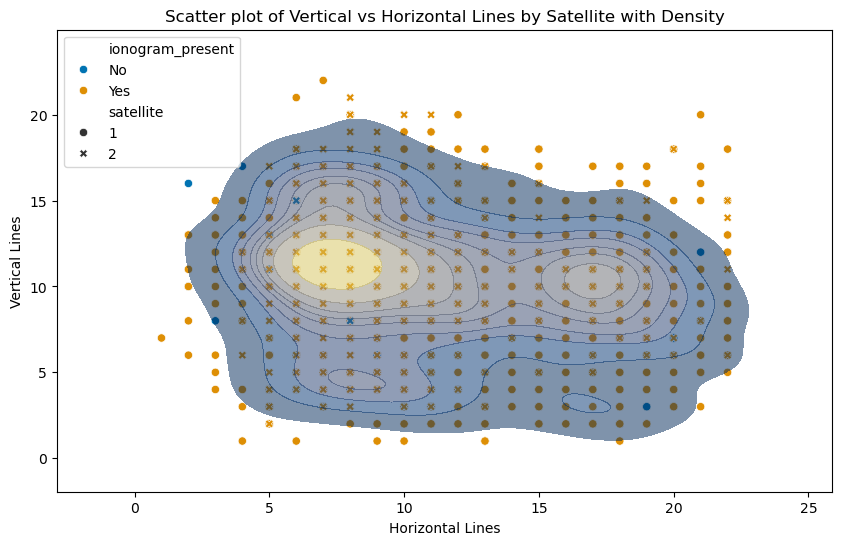

In [2]:
# Plot Color palette 
accessible_palette = sns.color_palette("colorblind")

# Plot for the Visualization of Selected Points 
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='horizontal_lines', y='vertical_lines', hue='ionogram_present', style='satellite', data=data, palette=accessible_palette)

# Density plot
sns.kdeplot(x='horizontal_lines', y='vertical_lines', data=data, cmap='cividis', fill=True, alpha=0.5)

plt.title('Scatter plot of Vertical vs Horizontal Lines by Satellite with Density')
plt.ylabel('Vertical Lines')
plt.xlabel('Horizontal Lines')
plt.show()

### Plots for Film Type

C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\4202368252.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.histplot(data, x='confidence', hue='film_type_numeric', multiple='dodge', bins=10, kde=True, palette=accessible_palette)


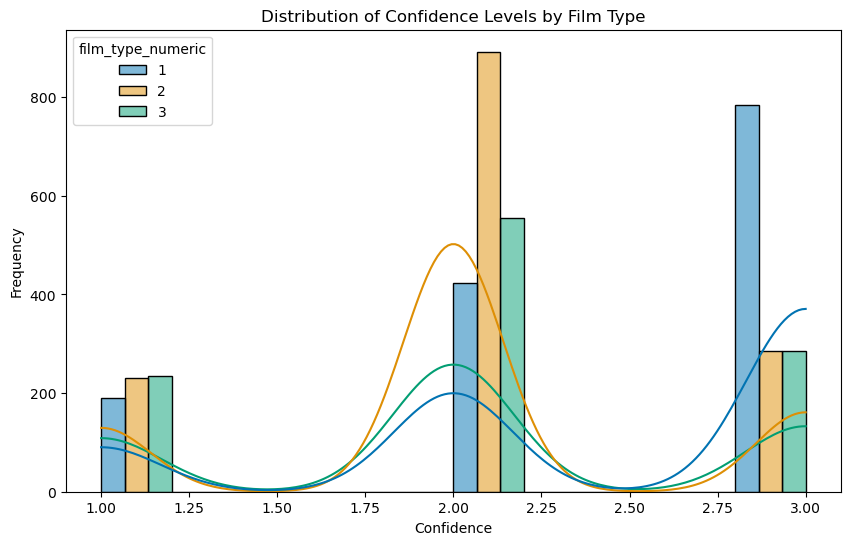

C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\4202368252.py:10: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='ionogram_present', hue='film_type_numeric', data=data, palette=accessible_palette)


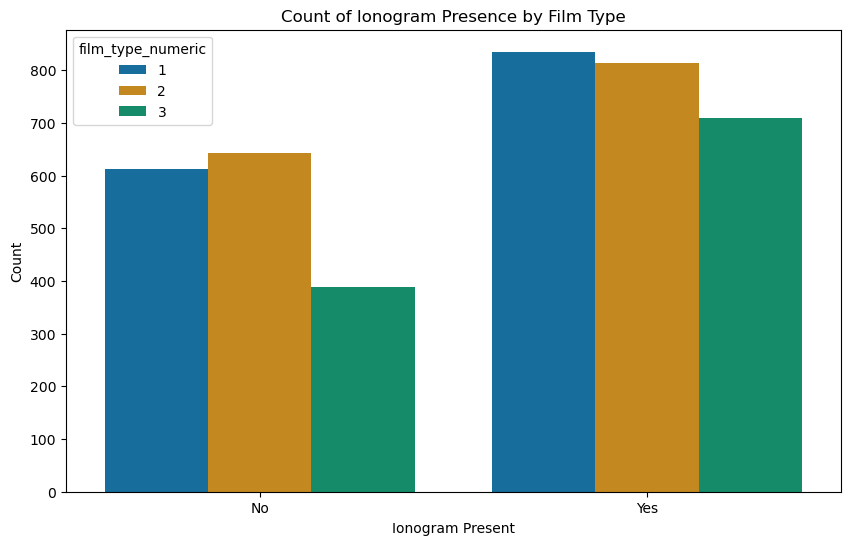

C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\4202368252.py:18: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.histplot(data, x='vertical_lines', hue='film_type_numeric', multiple='dodge', bins=10, kde=True, element='step', palette=accessible_palette)


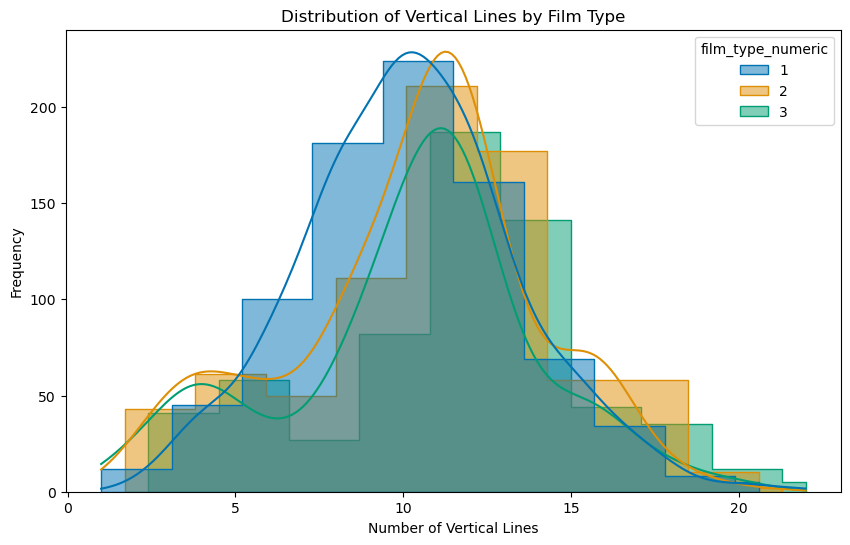

C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\4202368252.py:26: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.histplot(data, x='horizontal_lines', hue='film_type_numeric', multiple='dodge', bins=10, kde=True, element='step', palette=accessible_palette)


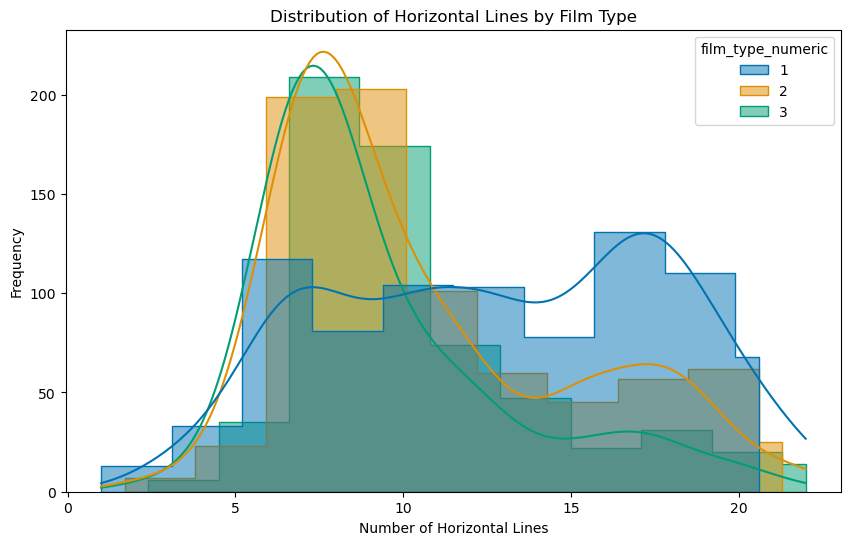

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='confidence', hue='film_type_numeric', multiple='dodge', bins=10, kde=True, palette=accessible_palette)
plt.title('Distribution of Confidence Levels by Film Type')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

# Plot: Count of Ionogram Presence by Satellite and Film Type
plt.figure(figsize=(10, 6))
sns.countplot(x='ionogram_present', hue='film_type_numeric', data=data, palette=accessible_palette)
plt.title('Count of Ionogram Presence by Film Type')
plt.xlabel('Ionogram Present')
plt.ylabel('Count')
plt.show()

# Plot: Distribution of Vertical Lines by Satellite and Film Type
plt.figure(figsize=(10, 6))
sns.histplot(data, x='vertical_lines', hue='film_type_numeric', multiple='dodge', bins=10, kde=True, element='step', palette=accessible_palette)
plt.title('Distribution of Vertical Lines by Film Type')
plt.xlabel('Number of Vertical Lines')
plt.ylabel('Frequency')
plt.show()

# Plot: Distribution of Horizontal Lines by Satellite and Film Type
plt.figure(figsize=(10, 6))
sns.histplot(data, x='horizontal_lines', hue='film_type_numeric', multiple='dodge', bins=10, kde=True, element='step', palette=accessible_palette)
plt.title('Distribution of Horizontal Lines by Film Type')
plt.xlabel('Number of Horizontal Lines')
plt.ylabel('Frequency')
plt.show()

### Plots for Satellite Type

C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\1219416146.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data, x='confidence', hue='satellite', multiple='dodge', bins=10, kde=True, palette=accessible_palette)


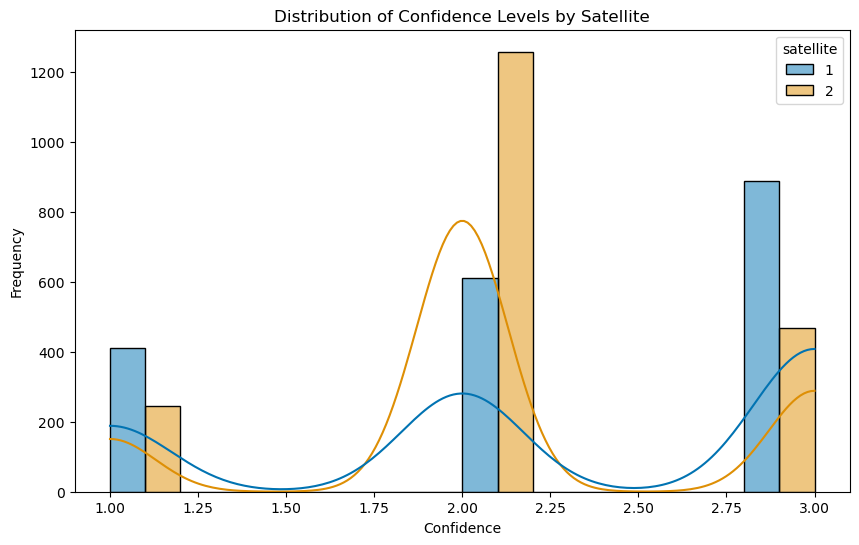

C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\1219416146.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='ionogram_present', hue='satellite', data=data, palette=accessible_palette)


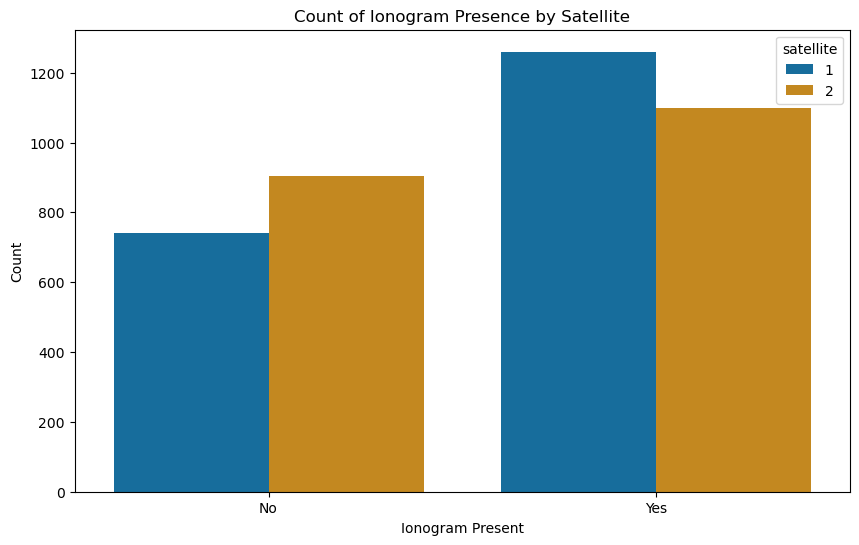

C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\1219416146.py:19: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data, x='vertical_lines', hue='satellite', multiple='dodge', bins=10, kde=True, element='step', palette=accessible_palette)


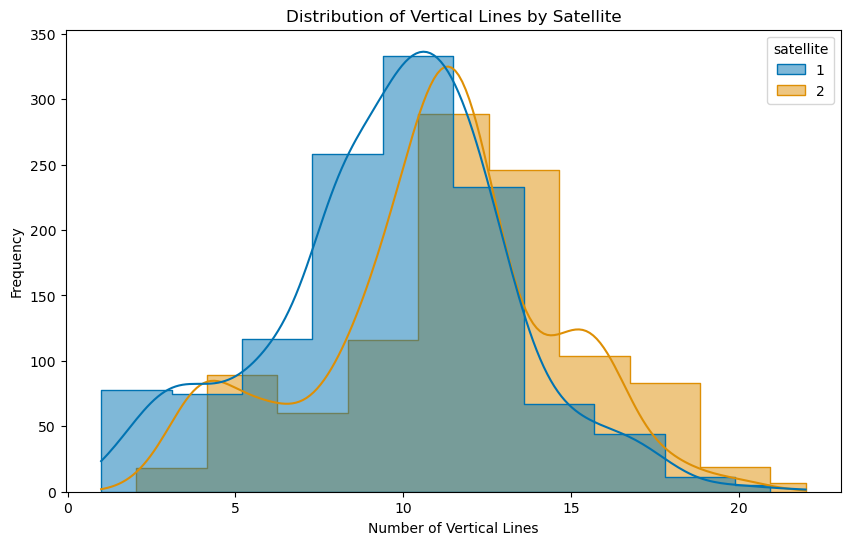

C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\1219416146.py:27: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data, x='horizontal_lines', hue='satellite', multiple='dodge', bins=10, kde=True, element='step', palette=accessible_palette)


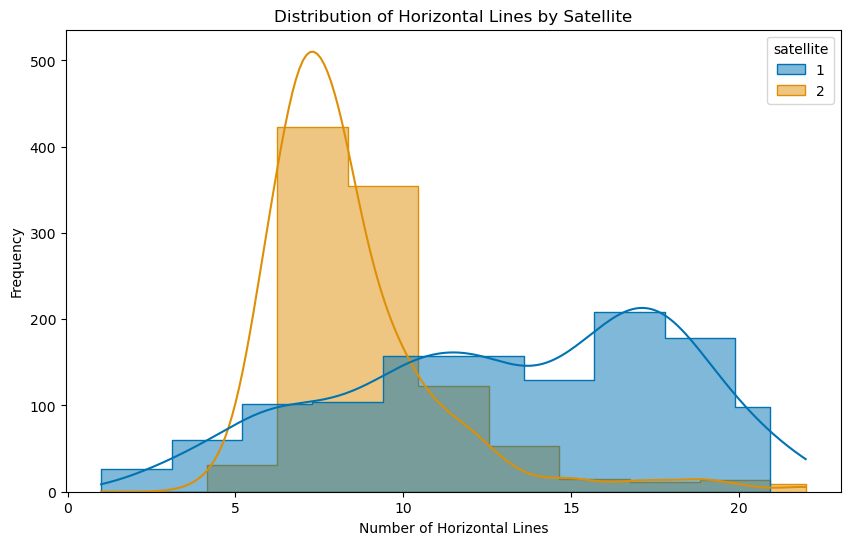

In [4]:
# Plot: Distribution of Confidence Levels
plt.figure(figsize=(10, 6))
sns.histplot(data, x='confidence', hue='satellite', multiple='dodge', bins=10, kde=True, palette=accessible_palette)
plt.title('Distribution of Confidence Levels by Satellite')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

# Plot: Count of Ionogram Presence by Satellite
plt.figure(figsize=(10, 6))
sns.countplot(x='ionogram_present', hue='satellite', data=data, palette=accessible_palette)
plt.title('Count of Ionogram Presence by Satellite')
plt.xlabel('Ionogram Present')
plt.ylabel('Count')
plt.show()

# Plot: Distribution of Vertical Lines by Satellite
plt.figure(figsize=(10, 6))
sns.histplot(data, x='vertical_lines', hue='satellite', multiple='dodge', bins=10, kde=True, element='step', palette=accessible_palette)
plt.title('Distribution of Vertical Lines by Satellite')
plt.xlabel('Number of Vertical Lines')
plt.ylabel('Frequency')
plt.show()

# Plot: Distribution of Horizontal Lines by Satellite
plt.figure(figsize=(10, 6))
sns.histplot(data, x='horizontal_lines', hue='satellite', multiple='dodge', bins=10, kde=True, element='step', palette=accessible_palette)
plt.title('Distribution of Horizontal Lines by Satellite')
plt.xlabel('Number of Horizontal Lines')
plt.ylabel('Frequency')
plt.show()

### Analysis Described
* From the visualization plots, it can be broadly described that there is a significant difference in horizontal lines between ISIS 1 & 2. 
* Additionally, for non-white film types, there is lower overall confidence due to increased ambiguity of the ionograms compared to increased contrast of the white background. 

### Correlation
* To support the above conclusions, analysis of correlation coefficients is required. 

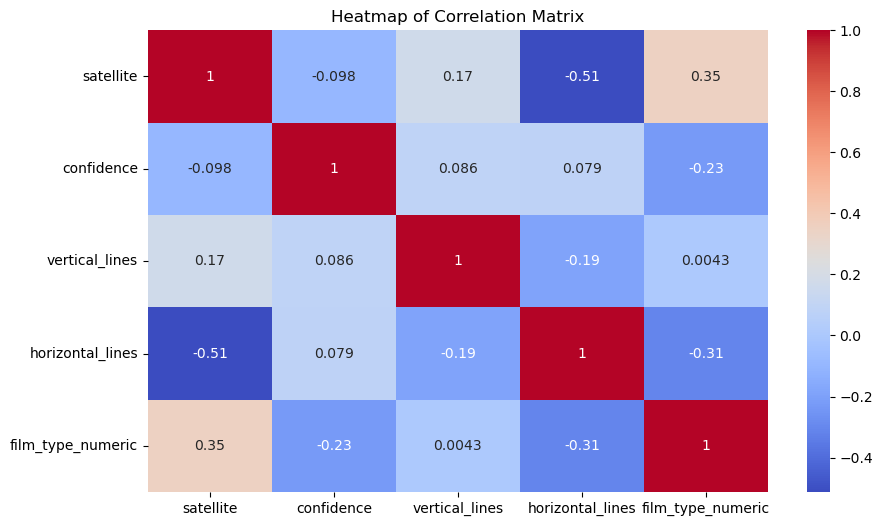

In [5]:
# Plot: Heatmap of Correlation Matrix by Satellite and Film Type
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

### Clustering to Determine Trends in Ionograms
* The purpose of performing clustering on the selected points of the ionogram is to determine if there are any trends or classes of similar ionograms. This is also helpful in determining if there are outliers from these classes suggesting potentially incorrectly labelled points.

C:\Users\jackj\anaconda3\envs\rcm_test_app\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\jackj\anaconda3\envs\rcm_test_app\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\jackj\anaconda3\envs\rcm_test_app\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\jackj\anaconda3\envs\rcm_test_app\lib\site-packages\sklearn\cluster\_kmea

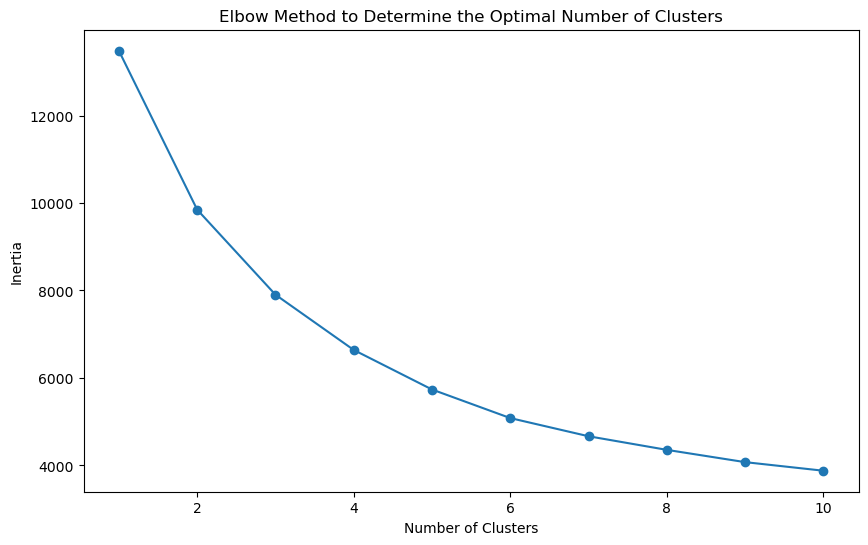

In [6]:
# Libraries for Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Function to extract numeric values from string tuples
def parse_tuple_string(s):
    try:
        return eval(s)
    except:
        return (np.nan, np.nan)

clustering_data = data.copy()
    
# Parsing String to Tuples
clustering_data['grid_point'] = clustering_data['grid_point'].apply(parse_tuple_string)
clustering_data['bottom_point'] = clustering_data['bottom_point'].apply(parse_tuple_string)
clustering_data['right_point'] = clustering_data['right_point'].apply(parse_tuple_string)

# Processing the Tuples to Numerical Points
clustering_data[['grid_point_x', 'grid_point_y']] = pd.DataFrame(clustering_data['grid_point'].tolist(), index=clustering_data.index)
clustering_data[['bottom_point_x', 'bottom_point_y']] = pd.DataFrame(clustering_data['bottom_point'].tolist(), index=clustering_data.index)
clustering_data[['right_point_x', 'right_point_y']] = pd.DataFrame(clustering_data['right_point'].tolist(), index=clustering_data.index)

# Removing Unneeded Rows
clustering_data.drop(columns=['grid_point', 'bottom_point', 'right_point'], inplace=True)
clustering_data.dropna(subset=['grid_point_x', 'grid_point_y', 'bottom_point_x', 'bottom_point_y', 'right_point_x', 'right_point_y'], inplace=True)

# Selecting the columns for clustering
clustering_features = clustering_data[['grid_point_x', 'grid_point_y', 'bottom_point_x', 'bottom_point_y', 'right_point_x', 'right_point_y']]

# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_features)

# Finding the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot: Elbow Method 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# This is accomplished by selecting the number of clusters where the plot begins to become a linear trend. 
# From the below plot it is slightly ambiguous as to if 6 or 7 clusters is optimal.


C:\Users\jackj\anaconda3\envs\rcm_test_app\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\3940819401.py:13: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(x='grid_point_x', y='bottom_point_x', hue='cluster', data=clustering_data, palette=accessible_palette)


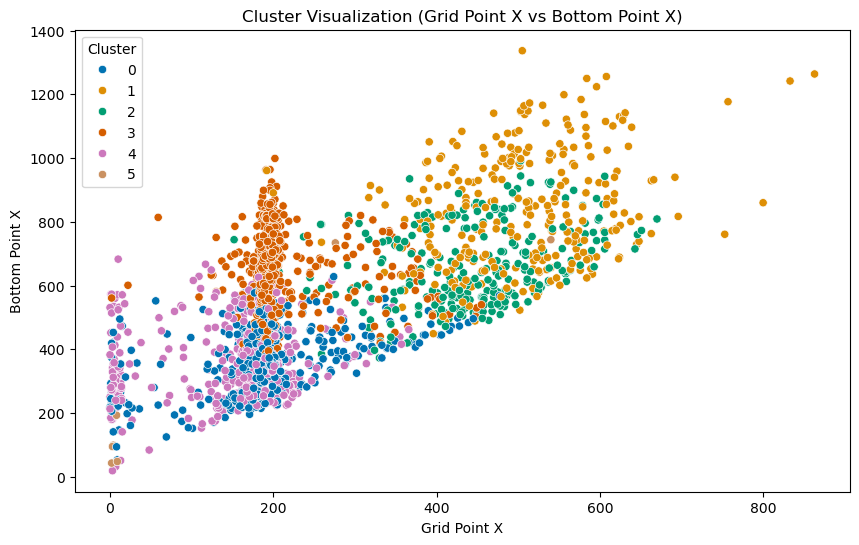

C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\3940819401.py:21: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(x='grid_point_x', y='right_point_x', hue='cluster', data=clustering_data, palette=accessible_palette)


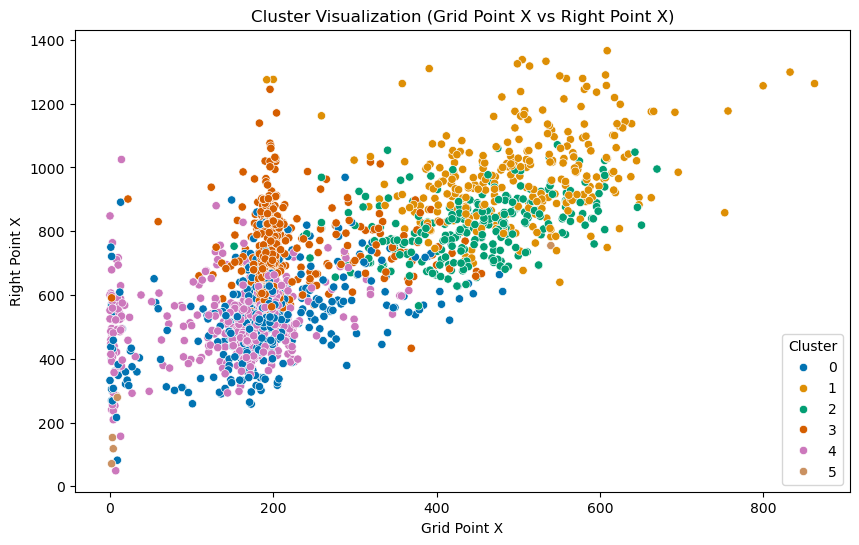

C:\Users\jackj\AppData\Local\Temp\ipykernel_62336\3940819401.py:29: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(x='bottom_point_x', y='right_point_x', hue='cluster', data=clustering_data, palette=accessible_palette)


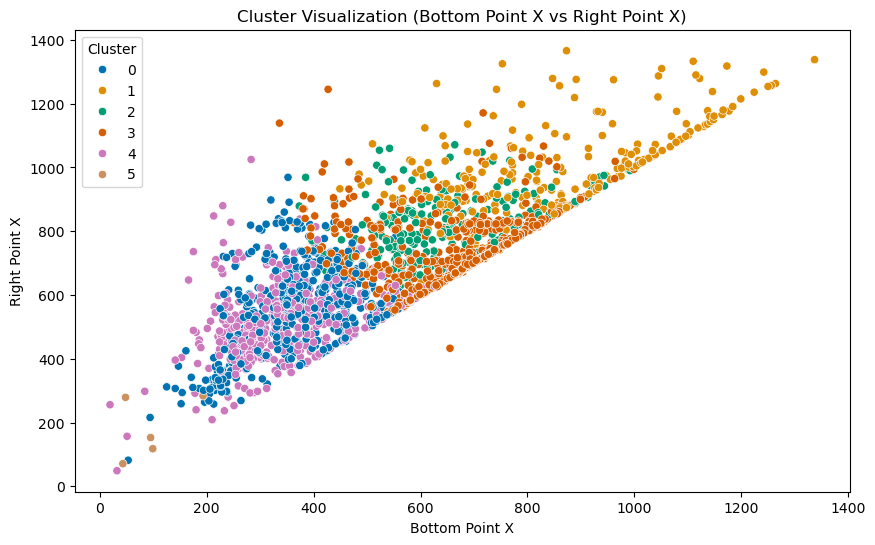

In [7]:
# Applying KMeans with the optimal number of clusters chosen
optimal_clusters = 6  # You can set this based on the elbow method plot

# Clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Adding the cluster labels to the original dataframe
clustering_data['cluster'] = clusters

# Plot: Cluster visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grid_point_x', y='bottom_point_x', hue='cluster', data=clustering_data, palette=accessible_palette)
plt.title('Cluster Visualization (Grid Point X vs Bottom Point X)')
plt.xlabel('Grid Point X')
plt.ylabel('Bottom Point X')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='grid_point_x', y='right_point_x', hue='cluster', data=clustering_data, palette=accessible_palette)
plt.title('Cluster Visualization (Grid Point X vs Right Point X)')
plt.xlabel('Grid Point X')
plt.ylabel('Right Point X')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bottom_point_x', y='right_point_x', hue='cluster', data=clustering_data, palette=accessible_palette)
plt.title('Cluster Visualization (Bottom Point X vs Right Point X)')
plt.xlabel('Bottom Point X')
plt.ylabel('Right Point X')
plt.legend(title='Cluster')
plt.show()


In [8]:
# Determining the Clusters and the Number in Each
cluster_counts = clustering_data['cluster'].value_counts()
print(cluster_counts)
clustering_data['cluster'] = clusters

cluster
3    660
4    516
0    516
1    292
2    256
5      7
Name: count, dtype: int64


### Cluster Analysis
* From the determined clusters, there is a class in which has 7 outliers that do not fit into the other clusters. These larger clusters denote trends in the selected points, whereas the 7 outliers are potentially erroneously selected. The following paths are the 7 outliers. 

* L:/DATA/ISIS/ISIS_101300030772/b16_R014207847/B1-35-5 ISIS A C-1413/Image0071.png
* L:/DATA/ISIS/ISIS_101300030772/b27_R014207898/B1-35-8 ISIS A C-1593/Image0239.png
* L:/DATA/ISIS/ISIS_102000056114/R014207888/B1-34-52 ISIS A C-393/Image0161.png
* L:/DATA/ISIS/ISIS_101300030772/b28_R014207705/B1-34-55 ISIS A C-585/Image0366.png
* L:/DATA/ISIS/ISIS_102000056114/R014207888/B1-34-52 ISIS A C-383/Image0646.png
* L:/DATA/ISIS/ISIS_102000056114/R014207888/B1-34-52 ISIS A C-399/Image0555.png
* L:/DATA/ISIS/ISIS_101300030772/b28_R014207705/B1-34-55 ISIS A C-590/Image0434.png
